# **Hilton Hotel London - Sentiment Analysis Project**

* **Name       :** Harish Kumar D
* **Student Id :** 0850003

###**About the Project**

This project focuses on customer reviews for Hilton Hotels in London. The objective is to understand key areas of dissatisfaction and use data-driven insights to suggest improvements. Additionally, a sentiment analysis model will be built to help the hotel classify future reviews efficiently, ensuring a proactive approach to enhancing guest satisfaction.

# Table of Contents

1. [Project Objectives and Deliverables](#1-project-objectives-and-deliverables)
2. [Data Understanding](#2-data-understanding)
3. [Initial Exploratory Data Analysis](#3-initial-exploratory-data-analysis)
   - [3.1 Numeric Score Distribution](#3.1-numeric-score-distribution)
   - [3.2 Hotel-Specific Sentiment Trends](#3.2-hotel-specific-sentiment-trends)
   - [3.3 Review Length Analysis](#3.3-review-length-analysis)
4. [Data Preprocessing](#4-data-preprocessing)
   - [4.1 Text Concatenation](#4.1-text-concatenation)
   - [4.2 Handling Missing Values in the Text](#4.2-handling-missing-values-in-the-text)
   - [4.3 Text Cleaning](#4.3-text-cleaning)
5. [Post-Cleaning EDA](#5-post-cleaning-eda)
   - [5.1 Word Frequency Analysis](#5.1-word-frequency-analysis)
6. [Balancing the Dataset](#6-balancing-the-dataset)
7. [Baseline Sentiment Analysis (VADER)](#7-baseline-sentiment-analysis-vader)
8. [Feature-Based Model Training and Comparison](#8-feature-based-model-training-and-comparison)
   - [8.1 Generalized Function for Model Evaluation](#8.1-generalized-function-for-model-evaluation)
   - [8.2 Logistic Regression](#8.2-logistic-regression)
   - [8.3 Random Forest](#8.3-random-forest)
   - [8.4 SVM](#8.4-svm)
   - [8.5 Performance Metrics for All Models Across Different Feature Sets (With Highlights)](#8.5-performance-metrics-for-all-models-across-different-feature-sets-with-highlights)
   - [8.6 Confusion Matrix for Logistic Regression with TF-IDF](#8.6-confusion-matrix-for-logistic-regression-with-tfidf)
9. [Advanced Model for Sentiment Analysis](#9-advanced-model-for-sentiment-analysis)
10. [Insights & Recommendations](#10-insights-and-recommendations)
11. [Final Conclusion](#11-final-conclusion)

<a name="1-project-objectives-and-deliverables"></a>
### **1. Project Objectives and Deliverables**


#### **Objectives**
* **Understand Customer Sentiments:** Analyze reviews to identify recurring issues.

* **Develop a Predictive Model:** Train a machine learning model to classify reviews as `Positive` or `Negative`.

#### **Deliverables**
* **Insights:**  Summarized themes from positive and negative reviews & actionable recommendations to improve the guest experience.  

* **Visualizations:** Word clouds and sentiment distribution charts for intuitive analysis.  

* **Predictive Model:** A trained, deployable sentiment analysis tool for review classification.

<a name="2-data-understanding"></a>
### **2. Data Understanding**

In [ ]:
# Importing the data

from google.colab import drive
drive.mount('/content/drive')

import os
project_folder = '/content/drive/My Drive/Colab Notebooks/Marketing_Induvidual_Project'
os.chdir(project_folder)

import pandas as pd

file_path = 'tripadvisor_scraped_hotel_reviews.csv'
hotel_reviews = pd.read_csv(file_path)
hotel_reviews.head()

Mounted at /content/drive


,hotel_name,review_summary,review_p1,review_p2,score
0,Hotel Hilton London Gatwick Airport,Awful...,Its hard to find words that can describe this ...,"its just all a bit 'run down' Poor food, not...","<span class=""ui_bubble_rating bubble_10""></span>"
1,Hotel Hilton London Gatwick Airport,Great start to hokidat,Staying in a hotel that’s part of the airport ...,NaN,"<span class=""ui_bubble_rating bubble_50""></span>"
2,Hotel Hilton London Gatwick Airport,A good overnight stay!,My wife and I stayed at this hotel for one nig...,flat-screen TV (with a huge selection of TV c...,"<span class=""ui_bubble_rating bubble_50""></span>"
3,Hotel Hilton London Gatwick Airport,Satisfactory one night stay,One night stay which turned out to be much be...,so higher prices are expected. Overall a very...,"<span class=""ui_bubble_rating bubble_40""></span>"
4,Hotel Hilton London Gatwick Airport,"Still nice but looking a bit sad, old and dated",We had an executive room and even these are st...,NaN,"<span class=""ui_bubble_rating bubble_40""></span>"


In [ ]:
# Inspecting dataset structure
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel_name      35078 non-null  object
 1   review_summary  17538 non-null  object
 2   review_p1       17538 non-null  object
 3   review_p2       4698 non-null   object
 4   score           17538 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [ ]:
# Checking for missing values
print(hotel_reviews.isnull().sum())

hotel_name            0
review_summary    17540
review_p1         17540
review_p2         30380
score             17540
dtype: int64


In [ ]:
# Dropping rows with missing 'score'
cleaned_reviews = hotel_reviews.dropna(subset=['score'])

# Dropping rows where both 'review_summary' and 'review_p1' are missing
cleaned_reviews = cleaned_reviews.dropna(subset=['review_summary', 'review_p1'], how='all')

# Verifyiing remaining missing values
print(cleaned_reviews.isnull().sum())

hotel_name            0
review_summary        0
review_p1             0
review_p2         12840
score                 0
dtype: int64


In [ ]:
# Checking for duplicate rows
print("Number of Duplicate Rows Before Cleaning:", cleaned_reviews.duplicated().sum())

Number of Duplicate Rows Before Cleaning: 1


In [ ]:
# Dropping duplicate rows
cleaned_reviews = cleaned_reviews.drop_duplicates()

# Verifying duplicates are removed
print("Number of Duplicate Rows After Cleaning:", cleaned_reviews.duplicated().sum())

Number of Duplicate Rows After Cleaning: 0


In [ ]:
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17537 entries, 0 to 35072
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hotel_name      17537 non-null  object
 1   review_summary  17537 non-null  object
 2   review_p1       17537 non-null  object
 3   review_p2       4697 non-null   object
 4   score           17537 non-null  object
dtypes: object(5)
memory usage: 822.0+ KB


In [ ]:
import re

# Extracting numeric scores from the 'score' column (e.g., 'bubble_50' -> 50)
cleaned_reviews['numeric_score'] = cleaned_reviews['score'].apply(
    lambda x: int(re.search(r'bubble_(\d+)', x).group(1)) if isinstance(x, str) and re.search(r'bubble_(\d+)', x) else None
)

# Verifying numeric score extraction
cleaned_reviews[['score', 'numeric_score']].head()

,score,numeric_score
0,"<span class=""ui_bubble_rating bubble_10""></span>",10
1,"<span class=""ui_bubble_rating bubble_50""></span>",50
2,"<span class=""ui_bubble_rating bubble_50""></span>",50
3,"<span class=""ui_bubble_rating bubble_40""></span>",40
4,"<span class=""ui_bubble_rating bubble_40""></span>",40


In [ ]:
# Mapping sentiment categories based on numeric_score
cleaned_reviews['Score_Sentiment_Category'] = cleaned_reviews['numeric_score'].apply(lambda x: 'Positive' if x >= 30 else 'Negative')
# Verifying sentiment categories based on numeric_score
cleaned_reviews[['numeric_score', 'Score_Sentiment_Category']].head()

,numeric_score,Score_Sentiment_Category
0,10,Negative
1,50,Positive
2,50,Positive
3,40,Positive
4,40,Positive


<a name="3-initial-exploratory-data-analysis"></a>
### **3. Initial Exploratory Data Analysis**

<a name="3.1-numeric-score-distribution"></a>
#### **3.1 Numeric Score Distribution**

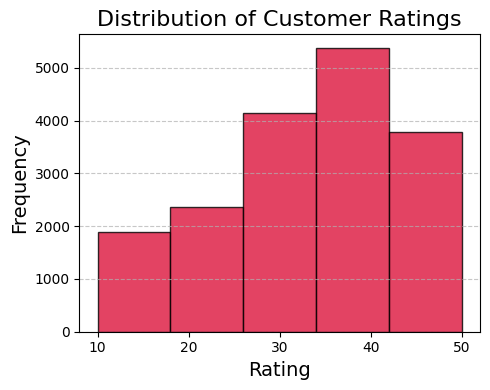


Numeric Score Distribution:
numeric_score
40    5364
30    4148
50    3787
20    2357
10    1881
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram for numeric_score
plt.figure(figsize=(5, 4))
plt.hist(cleaned_reviews['numeric_score'], bins=5, edgecolor='black', alpha=0.8, color='crimson')
plt.title("Distribution of Customer Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(range(10, 60, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Displaying numeric score counts
print("\nNumeric Score Distribution:")
print(cleaned_reviews['numeric_score'].value_counts())

1. **Mostly Positive Ratings**: Most customers rated their experience with scores of **40** and **50**, indicating overall satisfaction.  
2. **Reviews Average**: A lot of **30** range, meaning mixed or average reviews.  
3. **Few Bad Marks**: Scores of **10** and **20** are less frequent, meaning that extreme dissatisfaction is rarely experienced.

<a name="3.2-hotel-specific-sentiment-trends"></a>
#### **3.2 Hotel-Specific Sentiment Trends**

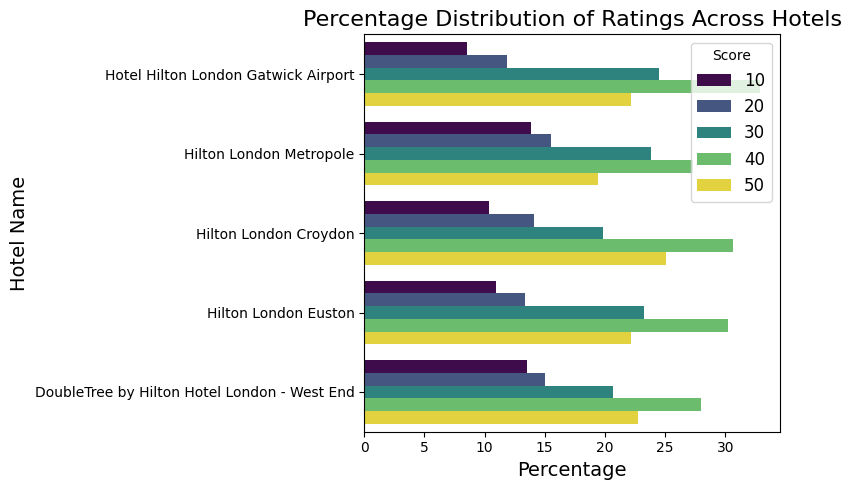

hotel_name                                    numeric_score
DoubleTree by Hilton Hotel London - West End  40                221
                                              50                180
                                              30                163
                                              20                119
                                              10                107
Hilton London Croydon                         40                442
                                              50                362
                                              30                286
                                              20                204
                                              10                150
Hilton London Euston                          40                304
                                              30                234
                                              50                223
                                              20                134
                                              10                110
Hilton London Metropole                       40               1513
                                              30               1318
                                              50               1076
                                              20                858
                                              10                768
Hotel Hilton London Gatwick Airport           40               2884
                                              30               2147
                                              50               1946
                                              20               1042
                                              10                746
Name: count, dtype: int64

In [ ]:
import seaborn as sns

# Calculating percentage distribution of scores for each hotel
score_percentage = (
    cleaned_reviews.groupby(['hotel_name', 'numeric_score'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: 100 * x / float(x.sum()))
    .reset_index(name='percentage')
)

# Plotting the percentage distribution of scores for each hotel
plt.figure(figsize=(8,5))
sns.barplot(
    data=score_percentage,
    y='hotel_name',
    x='percentage',
    hue='numeric_score',
    palette='viridis',
    order=cleaned_reviews['hotel_name'].value_counts().index[:10]  # Top 10 hotels
)
plt.title("Percentage Distribution of Ratings Across Hotels", fontsize=16)
plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Hotel Name", fontsize=14)
plt.legend(title="Score", loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()

# Hotel-specific numeric score value counts
hotel_value_counts = cleaned_reviews.groupby('hotel_name')['numeric_score'].value_counts()
hotel_value_counts

1. **London Gatwick Airport**: Most reviews are moderate (**30–40**) with few very low scores.
2. **London Metropole**: Mixed feedback with both high and low ratings.
3. **London Croydon**: Mostly positive (**30–40**), very few low scores.
4. **London Euston**: High ratings dominate (**40–50**), consistent satisfaction.
5. **DoubleTree West End**: Balanced feedback, leaning positive (**30–50**).

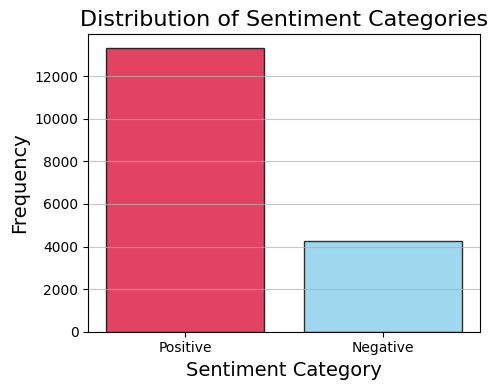


Score Sentiment Category Distribution:
Score_Sentiment_Category
Positive    13299
Negative     4238
Name: count, dtype: int64


In [ ]:
# Plotting the bar chart for Score_Sentiment_Category
plt.figure(figsize=(5, 4))
score_sentiment_counts = cleaned_reviews['Score_Sentiment_Category'].value_counts()
plt.bar(score_sentiment_counts.index, score_sentiment_counts.values, color=['crimson', 'skyblue'], edgecolor='black', alpha=0.8)
plt.title("Distribution of Sentiment Categories", fontsize=16)
plt.xlabel("Sentiment Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

# Displaying counts of Score_Sentiment_Category
print("\nScore Sentiment Category Distribution:")
print(score_sentiment_counts)


* The `Positive` category has significantly more samples than the `Negative` category, indicating a clear **class imbalance**.
* The dataset needs to be balanced (e.g., undersampling or oversampling) before modeling to ensure fair predictions across both classes.

<a name="3.3-review-length-analysis"></a>
#### **3.3 Review Length Analysis**

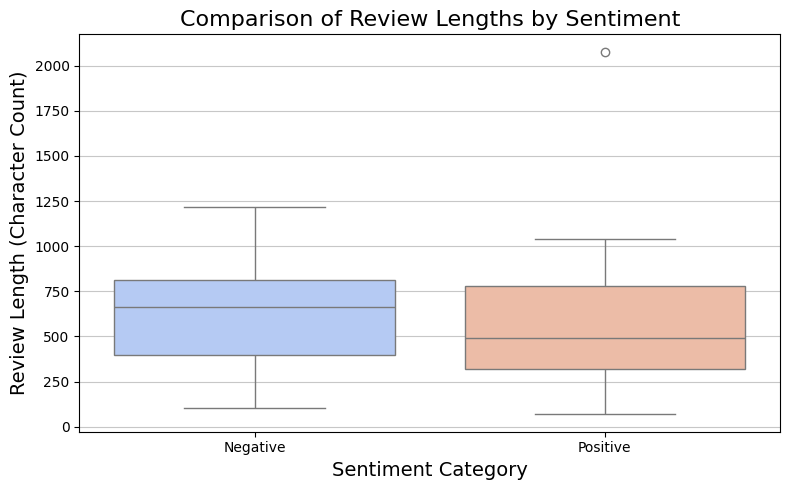

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Adding a column for review length (character count)
cleaned_reviews['review_length'] = (
    cleaned_reviews['review_summary'].fillna('') +
    cleaned_reviews['review_p1'].fillna('') +
    cleaned_reviews['review_p2'].fillna('')
).apply(len)

# Box plot for review lengths by sentiment category
plt.figure(figsize=(8, 5))
sns.boxplot(data=cleaned_reviews, x='Score_Sentiment_Category', y='review_length', palette='coolwarm')
plt.title("Comparison of Review Lengths by Sentiment", fontsize=16)
plt.xlabel("Sentiment Category", fontsize=14)
plt.ylabel("Review Length (Character Count)", fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

1. **Negative Reviews:** Usually longer, with more variability, as customers explain issues in detail.  
2. **Positive Reviews:** Tend to be shorter and more concise, reflecting straightforward satisfaction.  
3. **Outlier:** A very long positive review stands out as an exception.  

<a name="4-data-preprocessing"></a>
### **4. Data Preprocessing**

<a name="4.1-text-concatenation"></a>
#### **4.1 Text Concatenation**


In [ ]:
# Combining 'review_summary', 'review_p1', and 'review_p2' into a single 'final_review' column
cleaned_reviews['final_review'] = (
    cleaned_reviews['review_summary'].fillna('') + ' ' +
    cleaned_reviews['review_p1'].fillna('') + ' ' +
    cleaned_reviews['review_p2'].fillna('')
).str.strip()  # Remove any leading or trailing whitespace

# Verifying the new column
cleaned_reviews['final_review'].head()

,final_review
0,Awful... Its hard to find words that can descr...
1,Great start to hokidat Staying in a hotel that...
2,A good overnight stay! My wife and I stayed at...
3,Satisfactory one night stay One night stay wh...
4,"Still nice but looking a bit sad, old and date..."


<a name="4.2-handling-missing-values-in-the-text"></a>
#### **4.2 Handling Missing Values in the Text**

In [ ]:
# Removing rows where 'final_review' is missing or empty
cleaned_reviews = cleaned_reviews[cleaned_reviews['final_review'].str.strip() != '']

# Verifying no missing or empty reviews remaining
print("Missing 'final_review':", cleaned_reviews['final_review'].isnull().sum())
print("Empty 'final_review':", (cleaned_reviews['final_review'].str.strip() == '').sum())
print("Dataset shape after cleaning:", cleaned_reviews.shape)

Missing 'final_review': 0
Empty 'final_review': 0
Dataset shape after cleaning: (17537, 9)


<a name="4.3-text-cleaning"></a>
#### **4.3 Text Cleaning**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Downloadiing necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Initializing stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function for text cleaning
def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    # Removing special characters, punctuation, and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenizing text
    words = word_tokenize(text)
    # Removing stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Applying the cleaning function to the 'final_review' column
cleaned_reviews['cleaned_review'] = cleaned_reviews['final_review'].apply(clean_text)

cleaned_reviews[['final_review', 'cleaned_review']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,final_review,cleaned_review
0,Awful... Its hard to find words that can descr...,awful hard find word describe experience witho...
1,Great start to hokidat Staying in a hotel that...,great start hokidat staying hotel thats part a...
2,A good overnight stay! My wife and I stayed at...,good overnight stay wife stayed hotel one nigh...
3,Satisfactory one night stay One night stay wh...,satisfactory one night stay one night stay tur...
4,"Still nice but looking a bit sad, old and date...",still nice looking bit sad old dated executive...


<a name="5-post-cleaning-eda"></a>
### **5. Post-Cleaning EDA**

<a name="5.1-word-frequency-analysis"></a>
#### **5.1 Word Frequency Analysis**

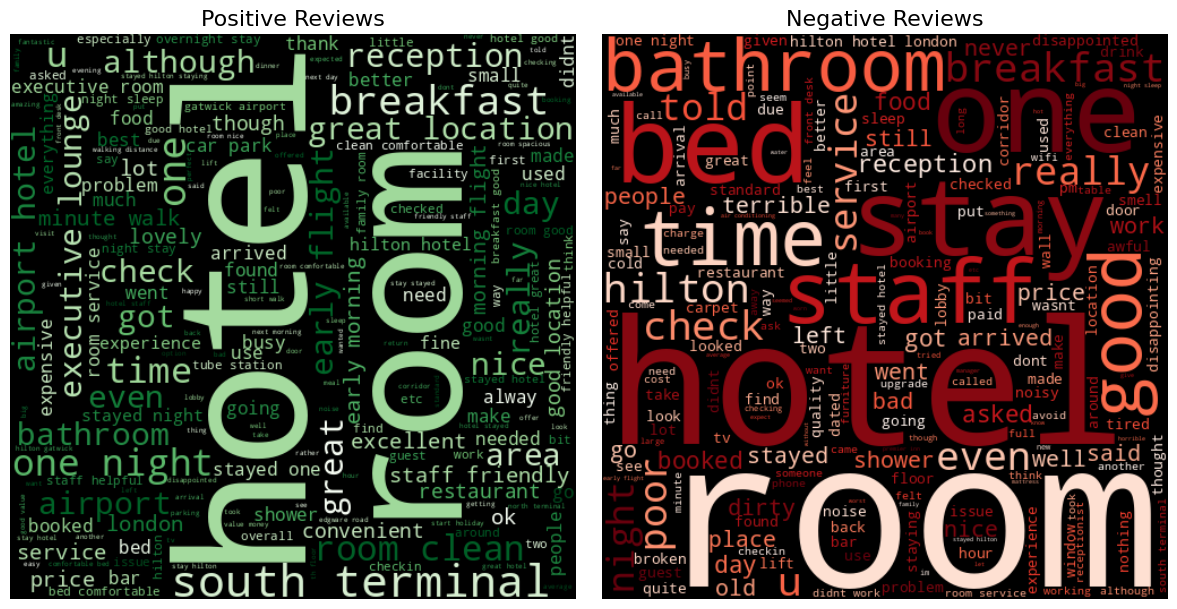

In [ ]:
from wordcloud import WordCloud

# Generating Positive Word Cloud
positive_reviews = ' '.join(cleaned_reviews[cleaned_reviews['Score_Sentiment_Category'] == 'Positive']['cleaned_review'])
positive_wordcloud = WordCloud(width=500, height=500, background_color='black', colormap='Greens').generate(positive_reviews)

# Generating Negative Word Cloud
negative_reviews = ' '.join(cleaned_reviews[cleaned_reviews['Score_Sentiment_Category'] == 'Negative']['cleaned_review'])
negative_wordcloud = WordCloud(width=500, height=500, background_color='black', colormap='Reds').generate(negative_reviews)

# Plotting Side-by-Side Word Clouds
plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=16)

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=16)

plt.tight_layout()
plt.show()

##### **Positive Reviews:**
1. Highlights include **room quality**, **cleanliness**, and **friendly staff**.
2. Words like **"location"**, **"lounge"**, and **"breakfast"** reflect satisfaction with convenience and amenities.

##### **Negative Reviews:**
1. Frequent complaints about **dirty rooms**, **poor service**, and **breakfast quality**.
2. Words like **"check"**, **"time"**, and **"staff"** point to inefficiencies and dissatisfaction.


<a name="6-balancing-the-dataset"></a>
### **6. Balancing the Dataset**

In [ ]:
from sklearn.utils import resample

# Separating majority (Positive) and minority (Negative) classes
positive_reviews = cleaned_reviews[cleaned_reviews['Score_Sentiment_Category'] == 'Positive']
negative_reviews = cleaned_reviews[cleaned_reviews['Score_Sentiment_Category'] == 'Negative']

# Undersampliing the Positive class to match the size of the Negative class
positive_reviews_undersampled = resample(
    positive_reviews,
    replace=False,  # Sample without replacement
    n_samples=len(negative_reviews),  # Match the size of Negative class
    random_state=3  # For reproducibility
)

# Combining undersampled Positive reviews with Negative reviews
balanced_reviews = pd.concat([positive_reviews_undersampled, negative_reviews])

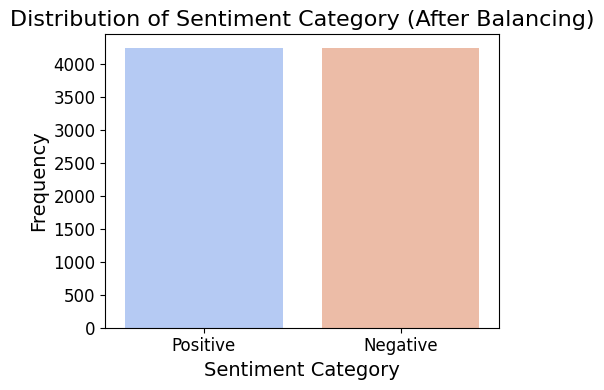

In [ ]:
# Verifying class distribution after undersampling
class_counts = balanced_reviews['Score_Sentiment_Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(5, 4))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    palette='coolwarm'
)
plt.title("Distribution of Sentiment Category (After Balancing)", fontsize=16)
plt.xlabel("Sentiment Category", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

<a name="7-baseline-sentiment-analysis-vader"></a>
### **7. Baseline Sentiment Analysis (VADER)**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report
import nltk

# Downloading the VADER lexicon
nltk.download('vader_lexicon')

# Initializing VADER Sentiment Intensity Analyzer
vader = SentimentIntensityAnalyzer()

# Applying VADER to the reviews in the balanced dataset
balanced_reviews['vader_sentiment'] = balanced_reviews['final_review'].apply(
    lambda x: vader.polarity_scores(x)['compound']
)

# Mapping VADER scores to Positive and Negative categories
balanced_reviews['vader_category'] = balanced_reviews['vader_sentiment'].apply(
    lambda score: 'Positive' if score >= 0 else 'Negative'
)

# Evaluating VADER performance
accuracy = accuracy_score(balanced_reviews['Score_Sentiment_Category'], balanced_reviews['vader_category'])
report = classification_report(balanced_reviews['Score_Sentiment_Category'], balanced_reviews['vader_category'])

# Print results
print(f"VADER Baseline Accuracy (Balanced Dataset): {accuracy:.2f}")
print("\nClassification Report (Balanced Dataset):")
print(report)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


VADER Baseline Accuracy (Balanced Dataset): 0.76

Classification Report (Balanced Dataset):
              precision    recall  f1-score   support

    Negative       0.86      0.62      0.72      4238
    Positive       0.70      0.90      0.79      4238

    accuracy                           0.76      8476
   macro avg       0.78      0.76      0.76      8476
weighted avg       0.78      0.76      0.76      8476



* **Overall Accuracy:** VADER achieves **76% accuracy** on the balanced dataset.

* **Positive Reviews:** High Recall (**90%**) and strong F1-Score (**79%**), showing good performance.

* **Negative Reviews:** High Precision (**86%**), but Recall is lower (**62%**), indicating some Negative reviews are misclassified as Positive.

VADER performs well overall but struggles with negativity, leading to lower Recall for Negative reviews.

<a name="8-feature-based-model-training-and-comparison"></a>
### **8. Feature-Based Model Training and Comparison**

<a name="8.1-generalized-function-for-model-evaluation"></a>
#### **8.1 Generalized Function for Model Evaluation**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from gensim.models import Word2Vec

def evaluate_all_features(model_type, data, target, random_state=42):

    # Initializing result dictionary
    results = {}

    # Feature Extraction Methods
    feature_types = ["bow", "tfidf", "word2vec"]

    for feature_type in feature_types:
        print(f"\nEvaluating with {feature_type.upper()}...")

        # Step 1: Generate Features
        if feature_type == "bow":
            vectorizer = CountVectorizer(max_features=1000)
            X = vectorizer.fit_transform(data['cleaned_review']).toarray()
        elif feature_type == "tfidf":
            vectorizer = TfidfVectorizer(max_features=1000)
            X = vectorizer.fit_transform(data['cleaned_review']).toarray()
        elif feature_type == "word2vec":
            data['tokenized_review'] = data['cleaned_review'].apply(lambda x: x.split())
            word2vec_model = Word2Vec(
                sentences=data['tokenized_review'],
                vector_size=100,
                window=5,
                min_count=1,
                workers=4
            )
            X = np.array(
                data['tokenized_review'].apply(
                    lambda tokens: np.mean(
                        [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv] or [np.zeros(100)],
                        axis=0
                    )
                ).tolist()
            )
        else:
            raise ValueError("Invalid feature_type. Choose from ['bow', 'tfidf', 'word2vec']")

        # Step 2: Train-Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=random_state)

        # Step 3: Model Selection
        if model_type == "logreg":
            model = LogisticRegression(random_state=random_state)
        elif model_type == "rf":
            model = RandomForestClassifier(random_state=random_state)
        elif model_type == "svm":
            model = SVC(random_state=random_state)
        else:
            raise ValueError("Invalid model_type. Choose from ['logreg', 'rf', 'svm']")

        # Step 4: Train the Model
        model.fit(X_train, y_train)

        # Step 5: Make Predictions
        y_pred = model.predict(X_test)

        # Step 6: Evaluate the Model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Store results
        results[feature_type] = {
            "accuracy": accuracy,
            "negative_f1_score": report['0']['f1-score'],
            "positive_f1_score": report['1']['f1-score']
        }

    # Display results in a table format
    print("\nPerformance Summary:")
    print(f"{'Feature Set':<15} {'Accuracy':<10} {'Negative F1':<15} {'Positive F1':<15}")
    print("-" * 50)
    for feature_type, metrics in results.items():
        print(f"{feature_type.upper():<15} {metrics['accuracy']:.2f}       {metrics['negative_f1_score']:.2f}          {metrics['positive_f1_score']:.2f}")

    return results

balanced_reviews['target'] = balanced_reviews['Score_Sentiment_Category'].map({'Positive': 1, 'Negative': 0})

<a name="8.2-logistic-regression"></a>
#### **8.2 Logistic Regression**

In [ ]:
logreg_results = evaluate_all_features(
    model_type="logreg",  # Logistic Regression
    data=balanced_reviews,
    target=balanced_reviews['target']
)


Evaluating with BOW...

Evaluating with TFIDF...

Evaluating with WORD2VEC...

Performance Summary:
Feature Set     Accuracy   Negative F1     Positive F1    
--------------------------------------------------
BOW             0.85       0.84          0.85
TFIDF           0.87       0.87          0.87
WORD2VEC        0.83       0.84          0.83


<a name="8.3-random-forest"></a>
#### **8.3 Random Forest**

In [ ]:
rf_results = evaluate_all_features(
    model_type="rf",  # Random Forest
    data=balanced_reviews,
    target=balanced_reviews['target']
)


Evaluating with BOW...

Evaluating with TFIDF...

Evaluating with WORD2VEC...

Performance Summary:
Feature Set     Accuracy   Negative F1     Positive F1    
--------------------------------------------------
BOW             0.84       0.84          0.84
TFIDF           0.84       0.84          0.84
WORD2VEC        0.83       0.84          0.83


<a name="8.4-svm"></a>
#### **8.4 SVM**

In [ ]:
svm_results = evaluate_all_features(
    model_type="svm",  # Support Vector Machine
    data=balanced_reviews,
    target=balanced_reviews['target']
)


Evaluating with BOW...

Evaluating with TFIDF...

Evaluating with WORD2VEC...

Performance Summary:
Feature Set     Accuracy   Negative F1     Positive F1    
--------------------------------------------------
BOW             0.86       0.87          0.86
TFIDF           0.86       0.87          0.86
WORD2VEC        0.83       0.84          0.83


<a name="8.5-performance-metrics-for-all-models-across-different-feature-sets-with-highlights"></a>
#### **8.5 Performance Metrics for All Models Across Different Feature Sets (With Highlights)**

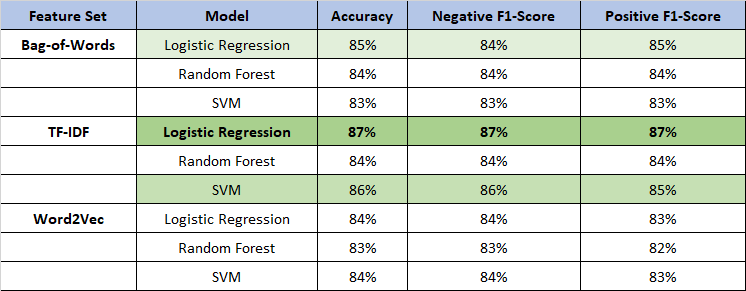

**Top Performing Model**
- The combination of **Logistic Regression with TF-IDF** is the standout performer, achieving **87% accuracy** and balanced F1-scores. This setup effectively captures term importance, making it highly reliable for sentiment classification.
- **SVM with TF-IDF or Bag-of-Words** follows closely, delivering strong and consistent results but slightly behind Logistic Regression.

**Feature Set Analysis**
- **TF-IDF**: Clearly the most powerful feature set, outperforming others across multiple models. Its ability to prioritize important terms proves crucial.
- **Bag-of-Words**: Performs decently, especially with SVM, but it lacks the sophistication and precision of TF-IDF.
- **Word2Vec**: Trails behind due to challenges in generating high-quality embeddings from the dataset, which impacts its effectiveness.

To push the boundaries further, we’ll explore **BERT (or other transformer models)** in the next step. These advanced models might uncover deeper relationships in the data, potentially outperforming traditional methods.

<a name="8.6-confusion-matrix-for-logistic-regression-with-tfidf"></a>
#### **8.6 Confusion Matrix for Logistic Regression with TF-IDF**

<Figure size 500x500 with 0 Axes>

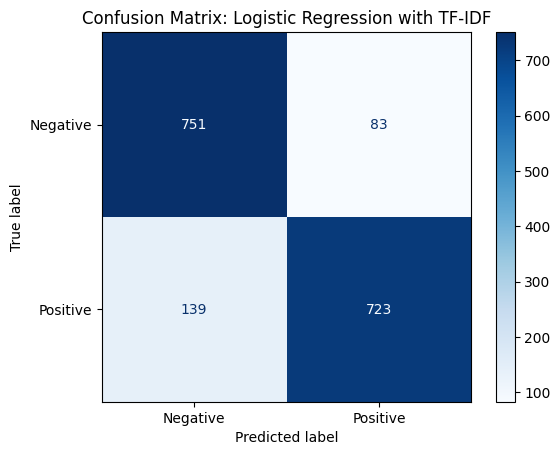

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 words
X_tfidf = tfidf_vectorizer.fit_transform(balanced_reviews['cleaned_review']).toarray()
y = balanced_reviews['target']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

logreg_tfidf = LogisticRegression(random_state=42)
logreg_tfidf.fit(X_train, y_train)

# Making Predictions
y_pred_best = logreg_tfidf.predict(X_test)

# Creating the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best, labels=[0, 1])

# Plotting the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
plt.figure(figsize=(5, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Logistic Regression with TF-IDF")
plt.show()

**True Negatives (TN):** **751 Negative reviews** were correctly predicted as Negative, showcasing strong performance for this class.  
**True Positives (TP):** **723 Positive reviews** were correctly predicted as Positive, confirming the model's effectiveness.  
**False Positives (FP):** **83 Negative reviews** were misclassified as Positive, likely due to ambiguous or neutral language.  
**False Negatives (FN):** **139 Positive reviews** were misclassified as Negative, indicating a slight difficulty in identifying subtle positive sentiments.  

The model performs slightly better on **Negative reviews** than Positive, with fewer False Positives compared to False Negatives.  


<a name="9-advanced-model-for-sentiment-analysis"></a>
### **9. Advanced Model for Sentiment Analysis**

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, accuracy_score
import torch

# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(
    balanced_reviews['cleaned_review'],
    balanced_reviews['Score_Sentiment_Category'].map({'Positive': 1, 'Negative': 0}),
    test_size=0.2, random_state=42
)

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(
            text, truncation=True, padding='max_length', max_length=128, return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }

train_dataset = SentimentDataset(X_train.tolist(), y_train.tolist())
test_dataset = SentimentDataset(X_test.tolist(), y_test.tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Model Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training
model.train()
for epoch in range(2):  # 2 epochs for simplicity
    for batch in train_loader:
        optimizer.zero_grad()
        outputs = model(
            input_ids=batch['input_ids'].to(device),
            attention_mask=batch['attention_mask'].to(device),
            labels=batch['label'].to(device)
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluation
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in test_loader:
        outputs = model(
            input_ids=batch['input_ids'].to(device),
            attention_mask=batch['attention_mask'].to(device)
        )
        y_pred.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        y_true.extend(batch['label'].cpu().numpy())

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Loss: 0.2775721549987793
Epoch 2, Loss: 0.32797351479530334
Accuracy: 0.8667452830188679
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       834
           1       0.88      0.85      0.87       862

    accuracy                           0.87      1696
   macro avg       0.87      0.87      0.87      1696
weighted avg       0.87      0.87      0.87      1696



#### **Performance of BERT**
- **Accuracy:** 86.67%  
- **F1-Score:** 0.87 for both Positive and Negative reviews.  
- **Precision and Recall:** Well-balanced for both classes, showing consistent performance.

#### **Comparison with Logistic Regression (TF-IDF)**
- BERT’s accuracy and F1-scores are almost identical to Logistic Regression with TF-IDF, both achieving around **87%**.  
- While BERT captures context better due to its advanced architecture, the improvement over TF-IDF is minimal in this dataset.


### **Recommendation**
- **Consider BERT:** If computational resources allow, BERT can provide robust performance, especially for complex text with nuanced context.
- **Stick to Logistic Regression for Simplicity:** Logistic Regression with TF-IDF delivers similar results with much lower computational requirements, making it ideal for quick deployment and scalability.

<a name="10-insights-and-recommendations"></a>
### **10. Insights & Recommendations**


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

negative_reviews = cleaned_reviews[cleaned_reviews['Score_Sentiment_Category'] == 'Negative']

def analyze_negative_reviews(hotel_name, negative_reviews):
    # Filteriing reviews for the specific hotel
    hotel_negative_reviews = negative_reviews[negative_reviews['hotel_name'] == hotel_name]

    # Combining all reviews into a single text
    hotel_text = " ".join(hotel_negative_reviews['cleaned_review'])

    # Initializing the Subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"Analysis of Negative Reviews for {hotel_name}", fontsize=20, color='black')

    # Step 1: Word Cloud
    wordcloud = WordCloud(
        width=650, height=500, background_color='white', colormap='plasma', max_words=100
    ).generate(hotel_text)

    axs[0, 0].imshow(wordcloud, interpolation='bilinear')
    axs[0, 0].axis('off')
    axs[0, 0].set_title("Word Cloud", fontsize=16, color='black')

    # Step 2: Frequent Words
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    word_counts = vectorizer.fit_transform(hotel_negative_reviews['cleaned_review'])
    word_freq_df = pd.DataFrame({
        'Word': vectorizer.get_feature_names_out(),
        'Frequency': word_counts.sum(axis=0).A1
    }).sort_values(by='Frequency', ascending=False)

    # Bar Chart for Frequent Words
    axs[0, 1].barh(word_freq_df['Word'], word_freq_df['Frequency'], color=plt.cm.plasma(np.linspace(0.5, 0.9, len(word_freq_df))))
    axs[0, 1].set_xlabel("Frequency", color='black')
    axs[0, 1].set_ylabel("Words", color='black')
    axs[0, 1].invert_yaxis()
    axs[0, 1].set_title("Top Words in Negative Reviews", fontsize=16, color='black')

    # Step 3: Phrases Analysis (Bigrams and Trigrams)
    # Bigrams
    bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=10)
    bigram_counts = bigram_vectorizer.fit_transform(hotel_negative_reviews['cleaned_review'])
    bigram_freq_df = pd.DataFrame({
        'Bigram': bigram_vectorizer.get_feature_names_out(),
        'Frequency': bigram_counts.sum(axis=0).A1
    }).sort_values(by='Frequency', ascending=False)

    # Trigrams
    trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=10)
    trigram_counts = trigram_vectorizer.fit_transform(hotel_negative_reviews['cleaned_review'])
    trigram_freq_df = pd.DataFrame({
        'Trigram': trigram_vectorizer.get_feature_names_out(),
        'Frequency': trigram_counts.sum(axis=0).A1
    }).sort_values(by='Frequency', ascending=False)

    # Plot Bigrams
    axs[1, 0].barh(bigram_freq_df['Bigram'], bigram_freq_df['Frequency'], color=plt.cm.plasma(np.linspace(0.5, 0.9, len(bigram_freq_df))))
    axs[1, 0].set_xlabel("Frequency", color='black')
    axs[1, 0].set_ylabel("Bigrams", color='black')
    axs[1, 0].invert_yaxis()
    axs[1, 0].set_title("Top 2-Word Phrases", fontsize=16, color='black')

    # Plot Trigrams
    axs[1, 1].barh(trigram_freq_df['Trigram'], trigram_freq_df['Frequency'], color=plt.cm.plasma(np.linspace(0.5, 0.9, len(trigram_freq_df))))
    axs[1, 1].set_xlabel("Frequency", color='black')
    axs[1, 1].set_ylabel("Trigrams", color='black')
    axs[1, 1].invert_yaxis()
    axs[1, 1].set_title("Top 3-Word Phrases", fontsize=16, color='black')

    # Finalize Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Step 4: Topic Modeling
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(hotel_negative_reviews['cleaned_review'])

    lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
    lda.fit(tfidf_matrix)

    print("\nTop Words for Each Topic:")
    for idx, topic in enumerate(lda.components_):
        top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        print(f"Topic {idx + 1}: {', '.join(top_words)}")

    # Dominant Topic Distribution
    topic_distribution = lda.transform(tfidf_matrix)
    hotel_negative_reviews['Dominant_Topic'] = np.argmax(topic_distribution, axis=1)
    topic_counts = hotel_negative_reviews['Dominant_Topic'].value_counts()

    print("\nDominant Topic Distribution in Reviews:")
    print(topic_counts)


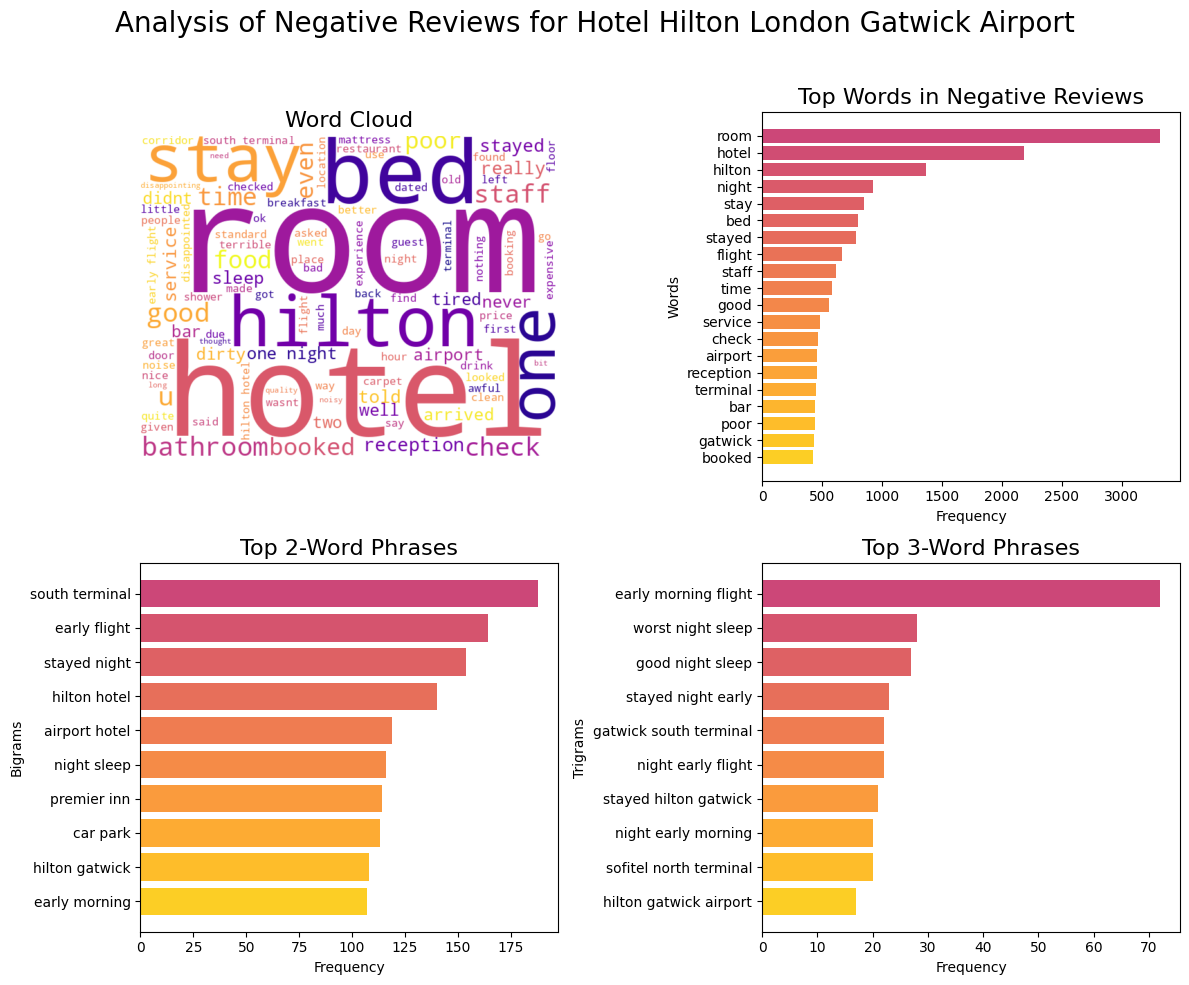


Top Words for Each Topic:
Topic 1: valet, room, service, told, hotel, booking, booked, parking, park, car
Topic 2: carpet, stay, dirty, night, bathroom, stayed, bed, hotel, hilton, room
Topic 3: pound, extortionate, haul, salad, confirmed, fish, gin, carvery, dish, similar
Topic 4: hotel, price, neighbour, management, catching, dingy, bring, mediocre, audience, captive
Topic 5: flight, good, stayed, staff, bed, stay, night, hilton, hotel, room

Dominant Topic Distribution in Reviews:
Dominant_Topic
4    1535
1     209
0      43
3       1
Name: count, dtype: int64


In [ ]:
analyze_negative_reviews("Hotel Hilton London Gatwick Airport", negative_reviews)

**Word Cloud**
- Words like **"room,"** **"hotel,"** and **"bed"** dominate, whiich indicates dissatisfaction with accommodation quality.
- Mentions of **"staff"** and **"check"** suggest concerns with service and check-in efficiency.

**Top Words in Negative Reviews**
- **"Room"** highlights recurring complaints about cleanliness and comfort.
- **"Staff"** and **"service"** points to dissatisfaction with customer interactions.

**Top 2-Word Phrases**
- **"South terminal"** and **"early flight"** suggest location and travel-related concerns.
- **"Stayed night"** reflects poor overnight experiences.

**Top 3-Word Phrases**
- **"Worst night sleep"** and **"good night sleep"** emphasize issues with comfort.

**Topic Modeling**
1. **Parking Problems:** Issues with valet services and parking (**valet**, **car**).  
2. **Cleanliness:** Complaints about room and bathroom hygiene (**dirty**, **bathroom**).  
3. **Overpriced Food:** High dining costs mentioned (**pound**, **dish**).  
4. **Value for Money:** Pricing concerns dominate (**price**, **mediocre**).  
5. **General Comfort:** Poor sleep quality and staff responsiveness (**stay**, **staff**).

**Dominant Topic:**  
- **General Comfort (Topic 5):** Most complaints revolve around discomfort and service quality.

**Recommendations**
1. **Enhance Room Cleanliness:** Focus on maintaining hygiene.
2. **Improve Sleep Quality:** Upgrade bedding and reduce noise levels.
3. **Address Parking Issues:** Simplify valet and parking services.
4. **Reassess Value:** Align pricing with guest expectations.

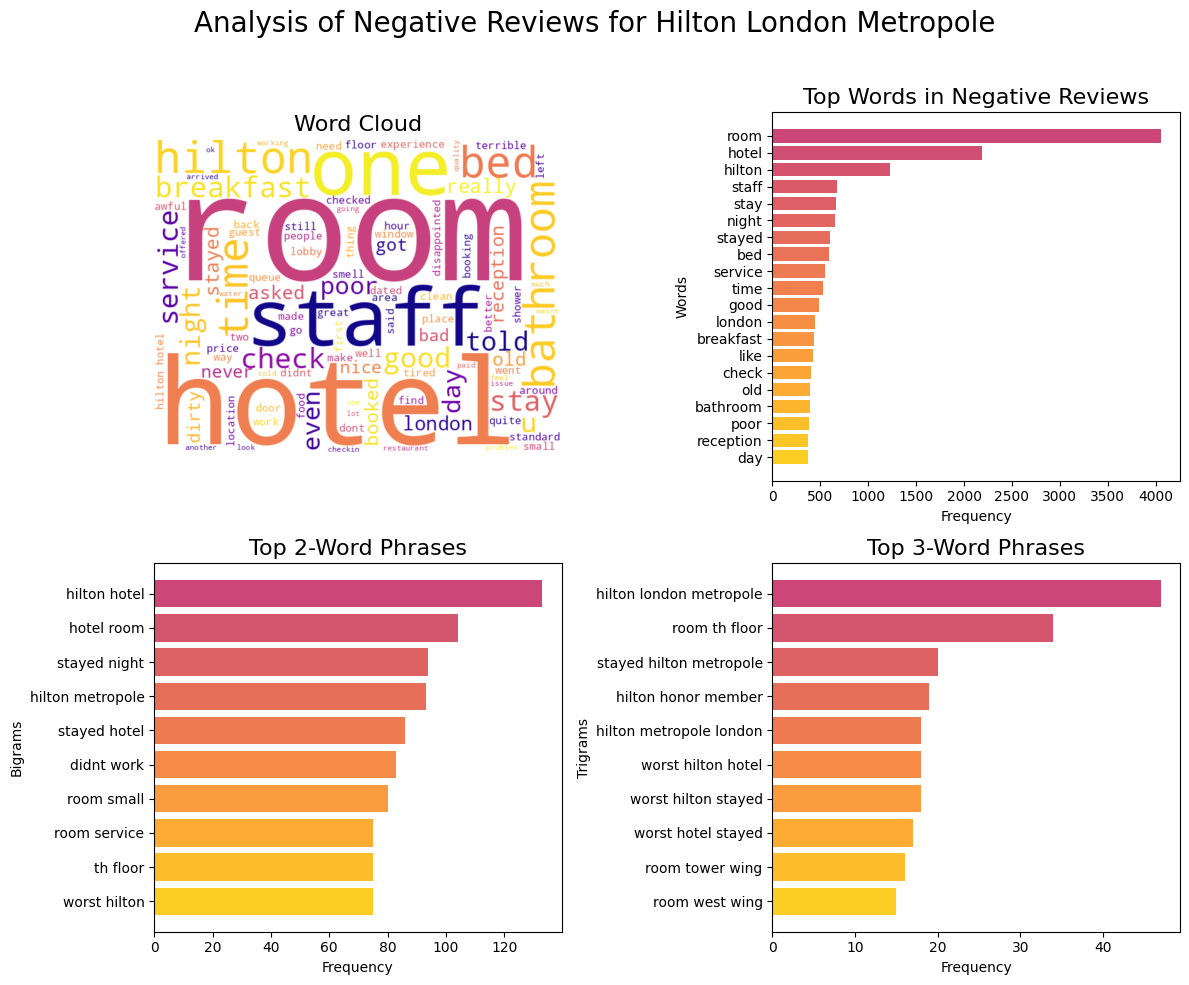


Top Words for Each Topic:
Topic 1: staff, stay, stayed, bathroom, bed, good, old, hilton, hotel, room
Topic 2: check, night, stay, time, staff, told, service, hilton, hotel, room
Topic 3: handle, bus, fair, nearby, parking, particularly, entrance, travelodge, milk, car
Topic 4: added, separate, say, shocking, milk, nearby, sister, disabled, slept, baby
Topic 5: shocking, separate, ground, showing, luckily, cash, waitress, effort, sky, stolen

Dominant Topic Distribution in Reviews:
Dominant_Topic
0    819
1    807
Name: count, dtype: int64


In [ ]:
analyze_negative_reviews("Hilton London Metropole", negative_reviews)

**Word Cloud**
- **Room** and **hotel** are the most prominent words, indicating dissatisfaction with room quality.
- Words like **staff**, **bathroom**, **service**, and **check** suggest issues with customer service, cleanliness, and delays during check-ins.

**Top Words in Negative Reviews**
- The frequent mentions of **room**, **staff**, and **bathroom** highlighta problems with room conditions and staff service related.

**Top 2-Word Phrases**
- **"Hilton hotel"** and **"hotel room"** indicates general disappointment with the brand and room quality.
- Phrases like **"didnt work"** and **"room small"** point to small spaces.

**Top 3-Word Phrases**
- **"Hilton London Metropole"** appears frequently, reflecting overall dissatisfaction with this hotel.
- Complaints like **"worst hilton stayed"** and **"room th floor"** suggest problems with specific floors and overall experience.

**Topic Modeling**
1. **Room and Staff Issues:** Complaints about unclean or small rooms and unhelpful staff (**room**, **staff**, **bathroom**).
2. **Check-in and Service:** Problems with check-in delays and poor service (**check**, **time**, **service**).
3. **Nearby Facilities:** Mentions of parking difficulties and nearby services (**parking**, **handle**, **nearby**).
4. **Unique Issues:** Scattered mentions of stolen items and poor handling of specific requests (**stolen**, **cash**, **effort**).
5. **General Stay Issues:** Broader dissatisfaction with the hotel experience (**stay**, **shocking**, **ground**).

**Dominant Topics:**
- **Topic 1 (Room and Staff Issues)** and **Topic 2 (Check-in and Service)** are the most significant, indicating room quality and staff/service issues dominate complaints.

**Recommendations**
1. **Room Upgrades:** Focus on improving room conditions, including cleanliness and furniture.
2. **Staff Training:** Train staff to improve responsiveness and professionalism.
3. **Check-in Process:** Streamline check-in to reduce delays.
4. **Address Specific Complaints:** Investigate issues with parking, broken amenities, and specific floors.

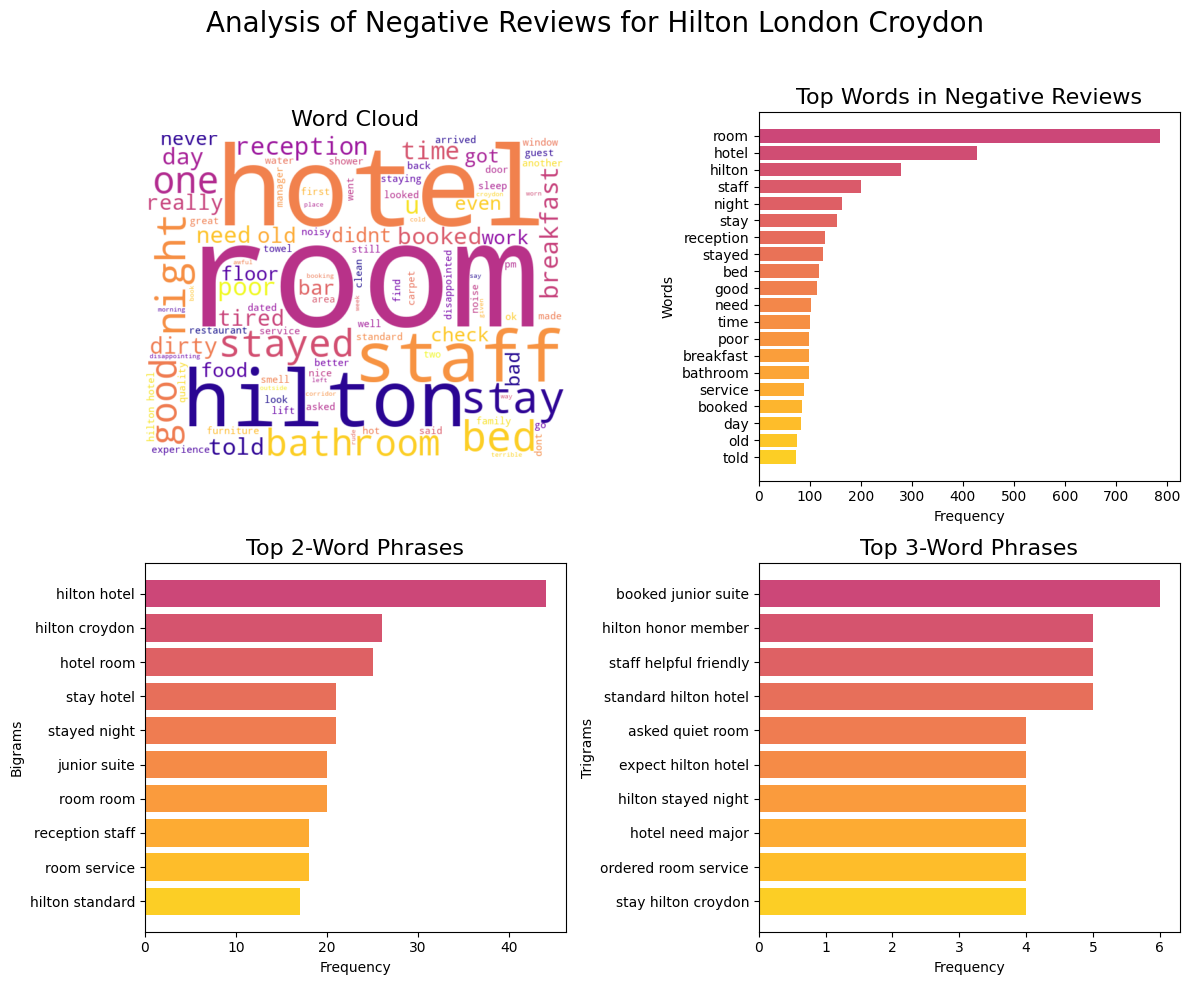


Top Words for Each Topic:
Topic 1: reception, night, stay, need, breakfast, good, hilton, staff, hotel, room
Topic 2: charged, car, night, said, stay, day, air, hilton, hotel, room
Topic 3: stay, bar, dirty, night, staff, stayed, bed, hilton, hotel, room
Topic 4: fcc, uhh, cigarette, ground, view, parent, shouting, card, jeff, hagg
Topic 5: action, ground, dance, cooling, afternoon, airport, unless, cake, bland, rrom

Dominant Topic Distribution in Reviews:
Dominant_Topic
0    181
2    137
1     35
3      1
Name: count, dtype: int64


In [ ]:
analyze_negative_reviews("Hilton London Croydon", negative_reviews)

**Word Cloud**
- Key complaints revolve around **room**, **hotel**, and **staff**, indicating dissatisfaction with room quality and customer service.
- Words like **reception**, **bathroom**, and **service** suggest specific issues with cleanliness, front-desk efficiency, and overall service quality.

**Top Words in Negative Reviews**
- Frequent mentions of **room**, **staff**, and **bathroom** reflect dissatisfaction with room conditions and service quality.

**Top 2-Word Phrases**
- Phrases like **"Hilton hotel"** and **"hotel room"** highlight general complaints about the hotel.
- **"Stayed night"** and **"room service"** suggest specific service delays or inadequacies.

**Top 3-Word Phrases**
- Complaints such as **"booked junior suite"** and **"staff helpful friendly"** indicate unmet expectations regarding room quality and service.
- Phrases like **"hotel need major"** point to larger maintenance or renovation concerns.

**Topic Modeling**
1. **Room and Service Issues:** Complaints about reception, room quality, and service delays (**reception**, **stay**, **staff**).
2. **Overcharges:** Guests mention being overcharged or extra fees (**charged**, **car**, **said**).
3. **Cleanliness Issues:** Dirty rooms and poor conditions dominate this topic (**dirty**, **bar**, **stay**).
4. **Miscellaneous Complaints:** Minor mentions like smoking areas or parental concerns (**cigarette**, **ground**, **view**).
5. **General Issues:** Broader dissatisfaction related to events or ambiance (**ground**, **action**, **bland**).

**Dominant Topics:**
- **Room and Service Issues** (Topic 1) and **Cleanliness Issues** (Topic 3) are most prevalent, highlighting persistent dissatisfaction with basic facilities and staff responsiveness.

**Recommendations**
1. **Focus on Room Cleanliness:** Ensure rooms and bathrooms are cleaned thoroughly before guest check-ins.
2. **Upgrade Reception Processes:** Improve check-in speed and efficiency at the front desk.
3. **Staff Training:** Train staff to better handle guest complaints and maintain professionalism.
4. **Renovate Facilities:** Address maintenance concerns to meet guest expectations for room quality.

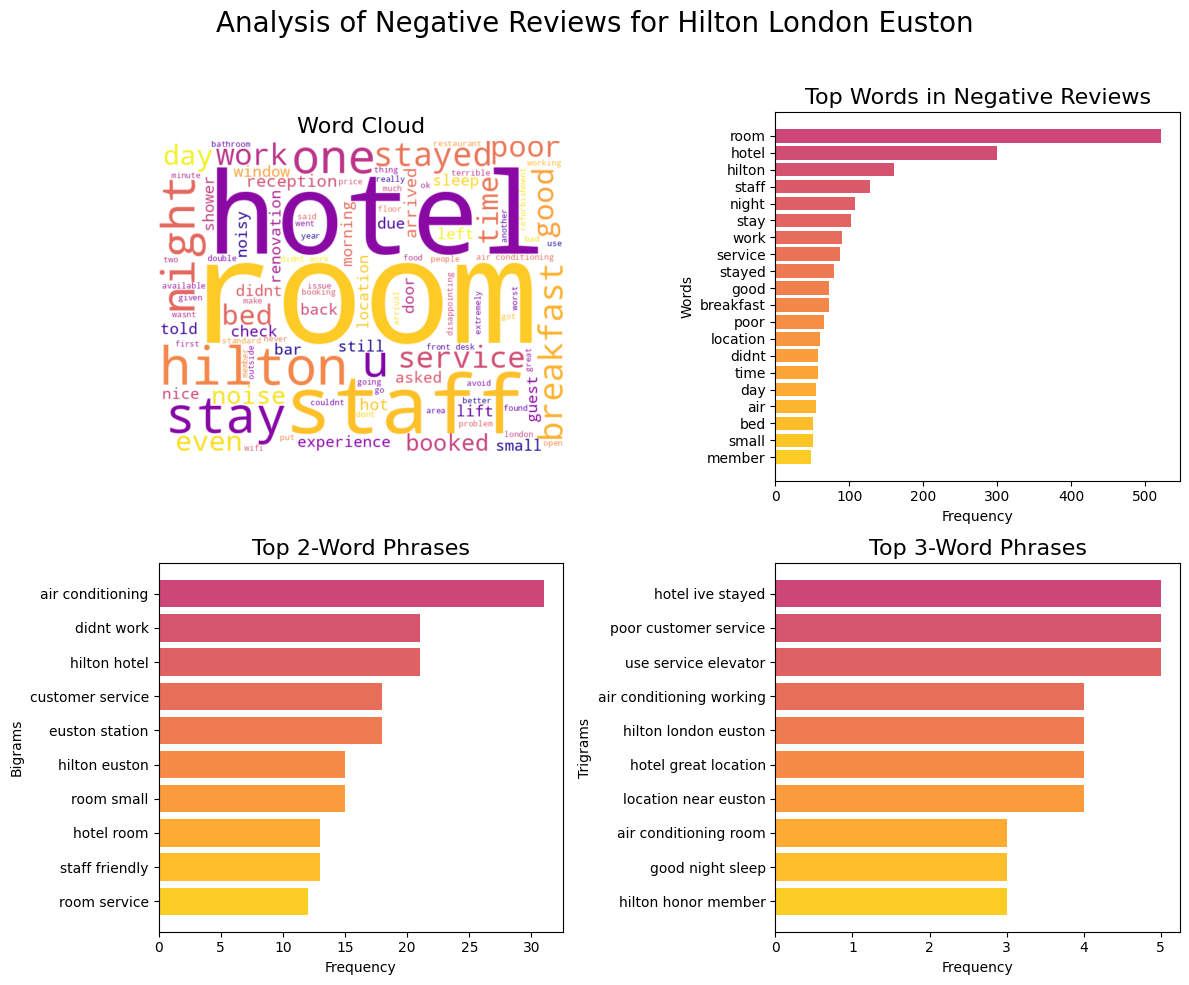


Top Words for Each Topic:
Topic 1: good, night, hilton, service, didnt, area, work, staff, hotel, room
Topic 2: london, service, great, day, stay, work, bar, hilton, hotel, room
Topic 3: booking, cot, check, baby, rate, heat, booked, stay, hotel, room
Topic 4: pm, good, member, desk, bathroom, refurbished, working, hotel, hilton, room
Topic 5: work, stayed, good, bed, hilton, staff, night, breakfast, hotel, room

Dominant Topic Distribution in Reviews:
Dominant_Topic
4    90
0    64
1    42
3    30
2    18
Name: count, dtype: int64


In [ ]:
analyze_negative_reviews("Hilton London Euston", negative_reviews)

**Word Cloud**  
- The words **room**, **hotel**, **staff**, and **service** appear prominently, which might suggest that these are common areas of dissatisfaction.  
- Words like **breakfast**, **work**, and **air conditioning** might indicate additional concerns with amenities, AC related problems and guest compliements.  

**Top Words in Negative Reviews**  
- **"Room"**, **"staff"**, and **"service"** seem to be recurring themes, likely reflecting dissatisfaction with accommodations and guest interactions.  
- Mentions of **"breakfast"**, **"location"**, and **"air"** could hint at specific issues with these aspects of the experience.  

**Top 2-Word Phrases**  
- Phrases such as **"air conditioning"** and **"didn't work"** might suggest frequent complaints about broken amenities.  
- **"Customer service"** and **"room small"** could point to challenges with service quality and room size.  

**Top 3-Word Phrases**  
- Phrases like **"poor customer service"** and **"air conditioning working"** might highlight dissatisfaction with service and facility maintenance.  
- Mentions such as **"good night sleep"** could indicate issues with comfort during the stay.  

**Topic Modeling**  
1. **Room and Service Issues:** Words like **room**, **staff**, and **service** might reflect concerns about room quality and guest service.  
2. **Amenity Problems:** Issues with **breakfast**, **air conditioning**, and **elevators** might be recurring themes.  
3. **Booking and Check-in:** Words like **booking** and **check** might suggest inefficiencies in these processes.  
4. **Refurbishment Needs:** Words such as **refurbished** and **bathroom** could indicate outdated facilities.  
5. **General Comfort Issues:** Words like **bed**, **breakfast**, and **stayed** might point to problems with guest comfort and maintenance.  

**Dominant Topics:**  
- Based on the analysis, **General Comfort Issues (Topic 5)** seem to be a key concern, possibly emphasizing discomfort and improper maintenance.  

**Recommendations**  
1. **Enhance guest comfort** by addressing concerns like bedding and noise insulation to improve sleep quality.  
2. **Resolve maintenance issues** by focusing on air conditioning and other frequently mentioned problems.  
3. **Prioritize facility updates** to ensure rooms and amenities are modern and well-maintained.  
4. **Improve customer service** with staff training to handle complaints effectively and enhance guest interactions.

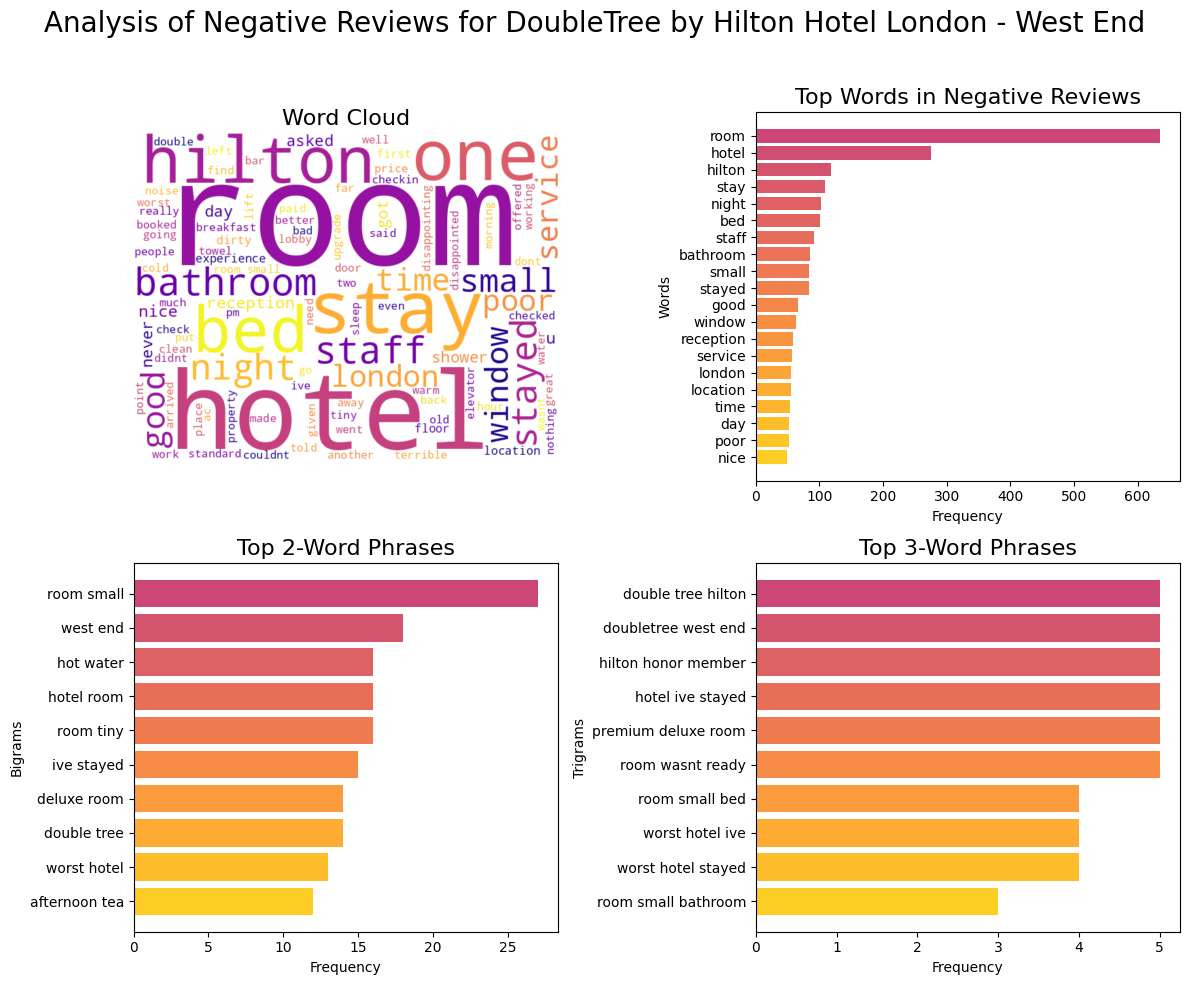


Top Words for Each Topic:
Topic 1: reception, time, dirty, stay, small, hilton, night, bed, hotel, room
Topic 2: deluxe, london, poor, bathroom, good, small, bed, hilton, hotel, room
Topic 3: poor, stay, charged, single, bed, honour, small, hotel, money, room
Topic 4: tiny, bathroom, worst, hilton, stay, location, good, staff, hotel, room
Topic 5: link, checking, including, eye, bring, vent, cover, deluxe, refund, honor

Dominant Topic Distribution in Reviews:
Dominant_Topic
0    123
3     59
1     25
2     17
4      2
Name: count, dtype: int64


In [ ]:
analyze_negative_reviews("DoubleTree by Hilton Hotel London - West End", negative_reviews)

**Word Cloud**  
- Words like **room**, **hotel**, **small**, and **staff** dominate, which could suggest concerns about room size and service quality.  
- Mentions of **bathroom**, **stay**, and **reception** indicate frequent issues related to amenities and guest experiences.  

**Top Words in Negative Reviews**  
- **"Room"** and **"small"** are the most mentioned, likely reflecting dissatisfaction with room size.  
- Words like **"bathroom"**, **"service"**, and **"reception"** highlight issues with facilities and front-desk interactions.  

**Top 2-Word Phrases**  
- **"Room small"** and **"room tiny"** suggest consistent complaints about inadequate space.  
- **"Hot water"** and **"afternoon tea"** may point to specific service-related concerns.  

**Top 3-Word Phrases**  
- Phrases like **"room small bed"** and **"room wasn’t ready"** suggest complaints about comfort and service delays.  
- **"Double tree hilton"** reflects overall dissatisfaction with the hotel chain’s branding experience.  

**Topic Modeling**  
1. **Room Size and Cleanliness:** Frequent dissatisfaction with small, cramped, or unclean rooms (**small**, **dirty**, **bed**).  
2. **Bathroom Quality:** Complaints about bathroom conditions and hot water availability (**bathroom**, **deluxe**, **poor**).  
3. **Service Issues:** Problems with service quality and readiness (**service**, **reception**, **ready**).  

**Dominant Topics:**  
- **Room Size and Cleanliness (Topic 1)** dominate, followed by **Bathroom Quality (Topic 2)**, highlighting dissatisfaction with room conditions and amenities.  

**Recommendations**  
1. **Expand room sizes** or better communicate dimensions during booking.  
2. **Improve bathroom maintenance** to ensure facilities meet guest expectations.  
3. **Train staff** to address service delays and improve readiness.  

<a name="11-final-conclusion"></a>
### **11. Final Conclusion**

Our analysis revealed common issues across Hilton Hotels in London, such as room cleanliness, room size, service quality, and value for money, with clear recommendations to address them. These include improving hygiene, upgrading facilities, training staff for better service, and re-evaluating pricing strategies.

For sentiment analysis, Logistic Regression with TF-IDF stood out as the most reliable and practical model, delivering strong accuracy and F1-scores. While advanced models like BERT offer deeper insights, Logistic Regression provides an efficient and scalable solution for real-world deployment.